In [ ]:
# Import the necessary module to mount Google Drive in Google Colab
from google.colab import drive
# Mount Google Drive to the Colab environment
drive.mount('/content/drive')

# Import necessary libraries for data analysis and visualization
import pandas as pd             # For data manipulation and analysis
import seaborn as sns           # For data visualization
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations
import numpy as np              # For numerical operations
from scipy.stats import pearsonr # For calculating Pearson correlation coefficient


Mounted at /content/drive


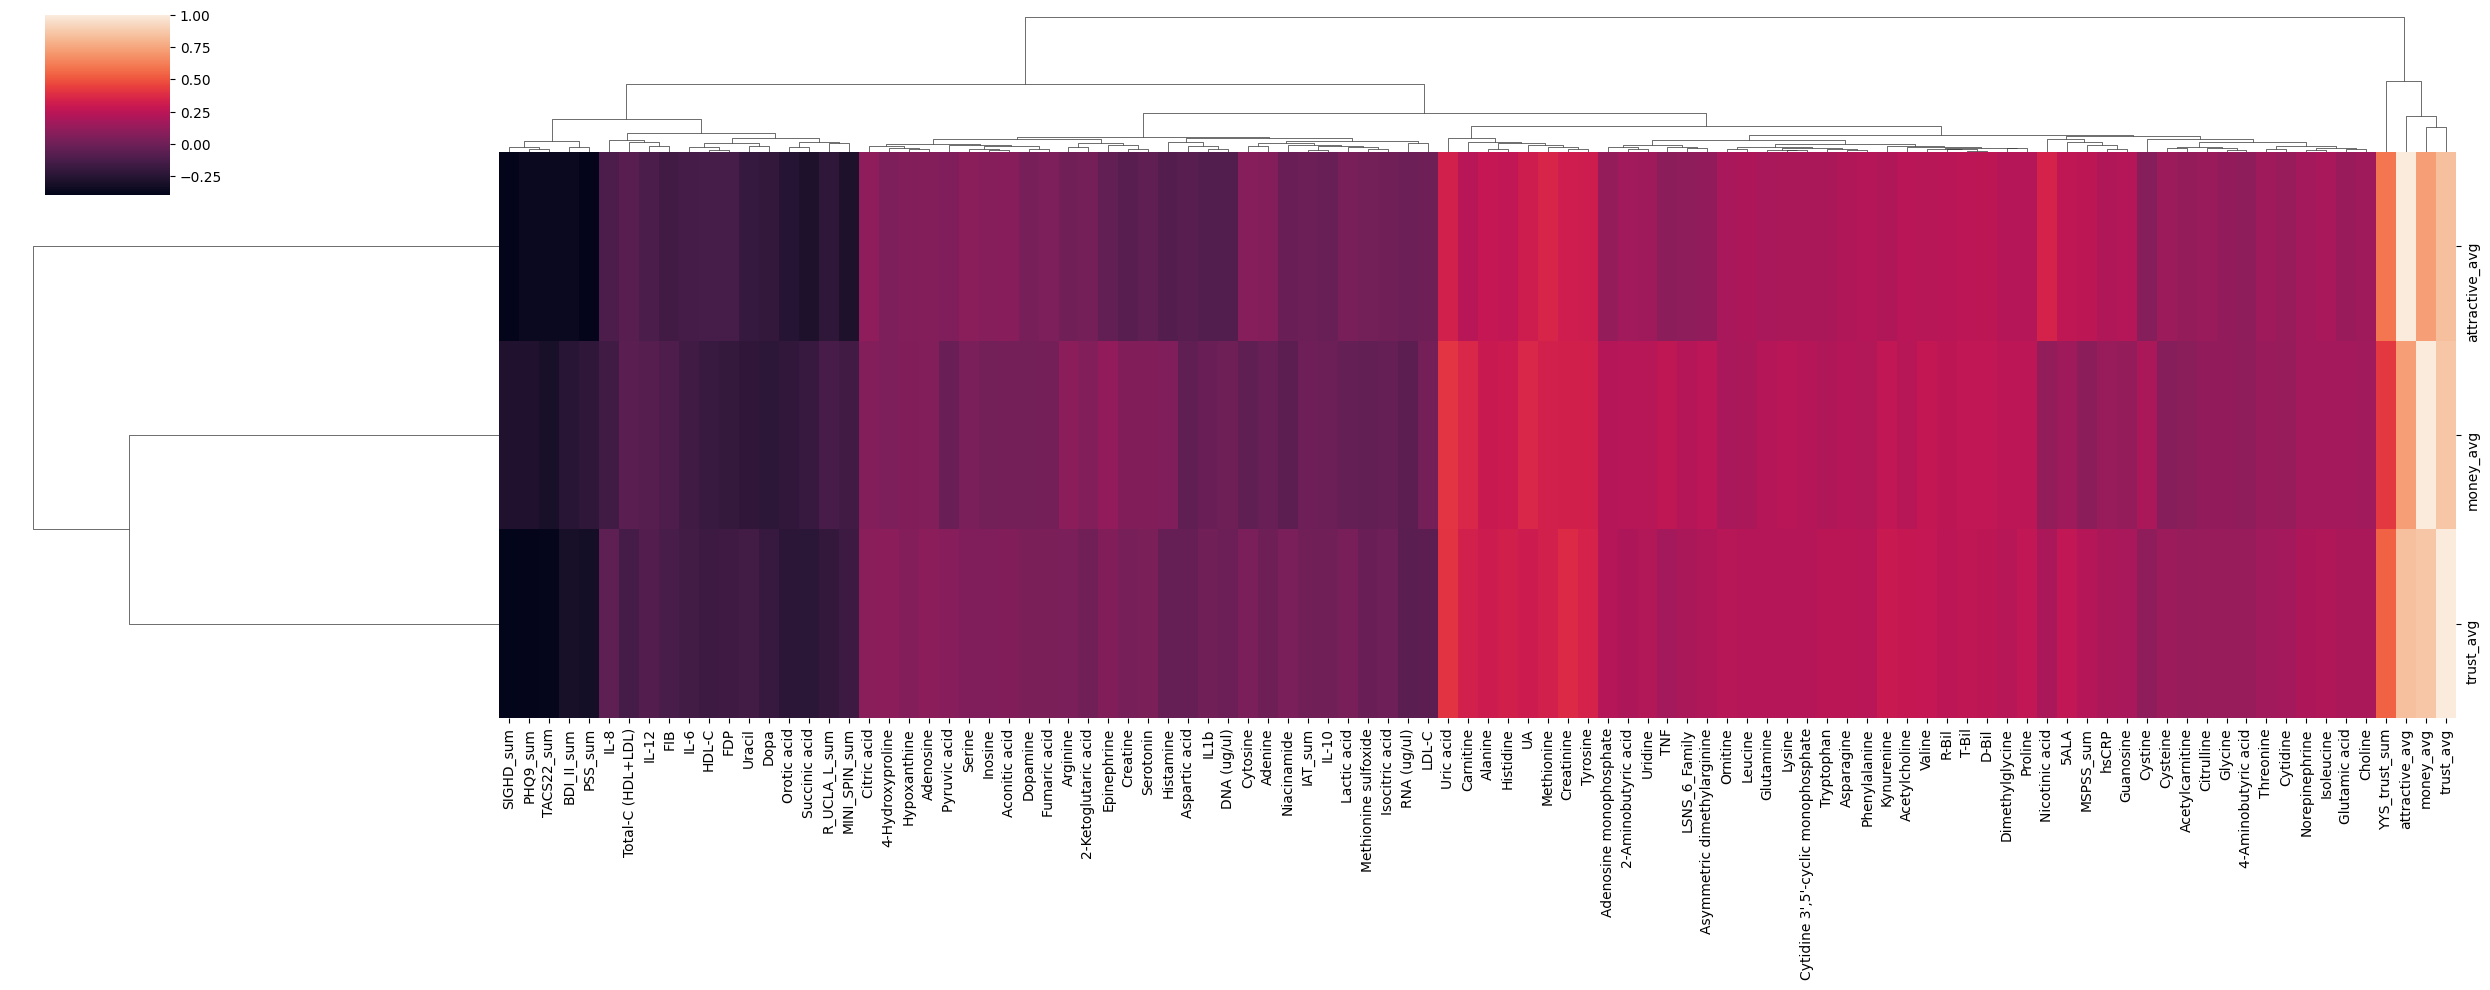

In [ ]:
# Load the correlation behavior data from Google Drive
corr_behavior = pd.read_excel('/content/drive/MyDrive/hikikomoridata/corr_behavior230324.xlsx', index_col=0)

# Display a clustered heatmap of the correlation behavior data
sns.clustermap(corr_behavior, figsize=(25, 10))

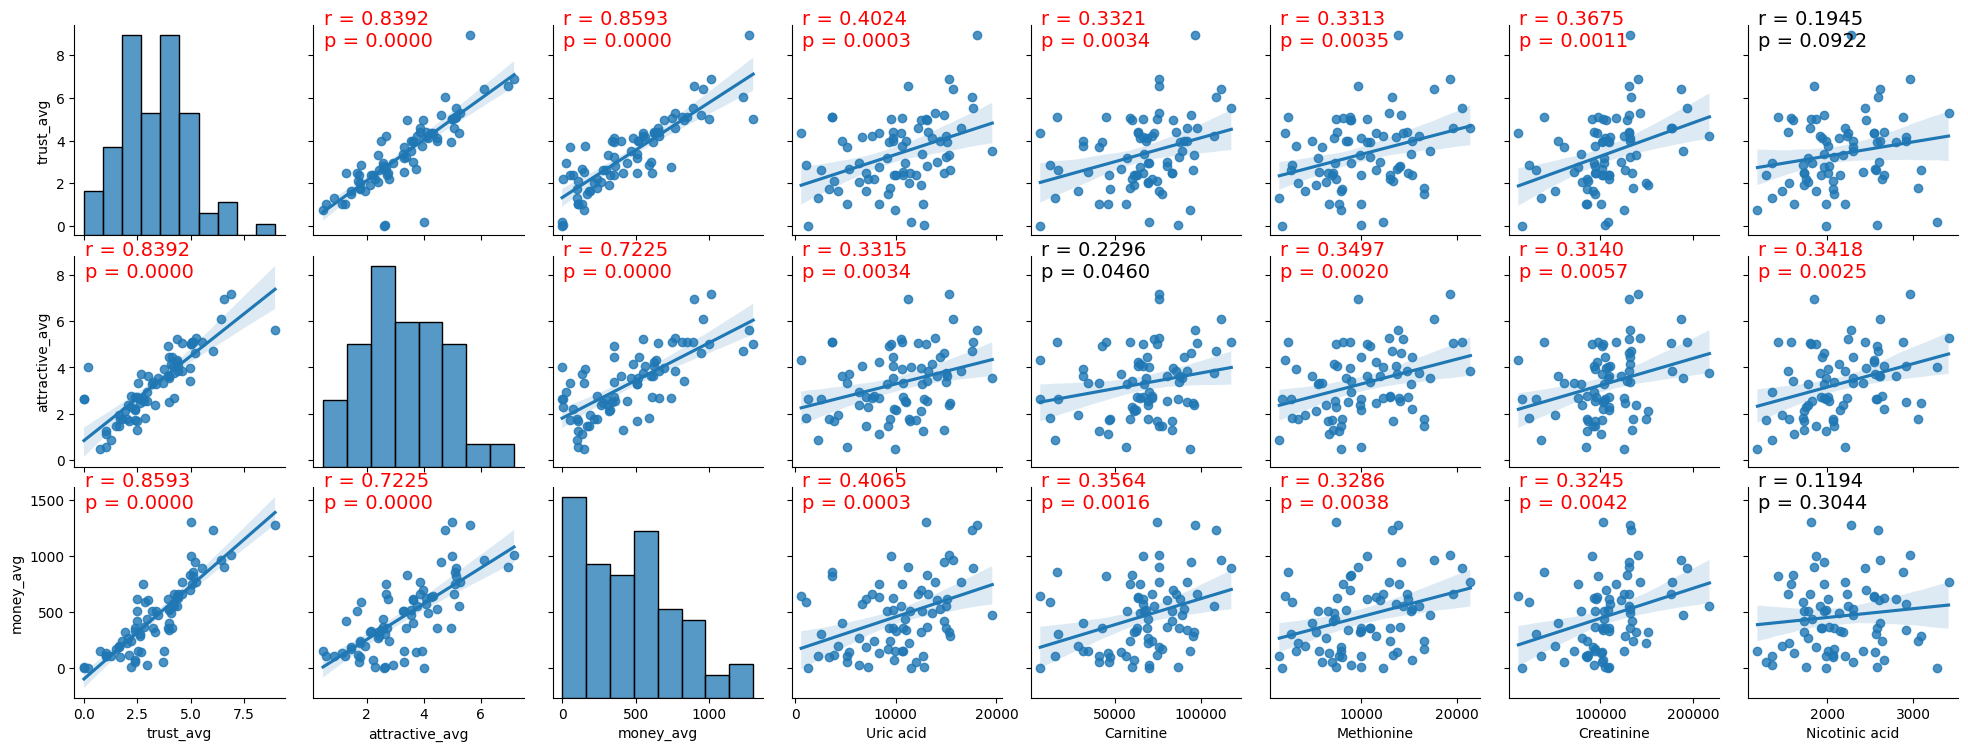

In [ ]:
# Load the entropy post data from Google Drive
entropy_post = pd.read_excel('/content/drive/MyDrive/hikikomoridata/hcdp_post_232227.xlsx')

# Define the biomarkers and average metrics
biomarker = ['trust_avg', 'attractive_avg', 'money_avg', 'Uric acid', 'Carnitine', 'Methionine', 'Creatinine', 'Nicotinic acid']
avg = ['trust_avg', 'attractive_avg', 'money_avg']

# Define a function to annotate each subplot with the correlation coefficient (r) and p-value
def annotate_r(x, y, **kws):
    r, p = pearsonr(x, y)  # Calculate Pearson correlation coefficient and p-value
    ax = plt.gca()
    color = 'red' if abs(r) > 0.25 else 'black'  # Choose color based on the magnitude of r
    ax.text(.05, .9, f'r = {r:.4f}\np = {p:.4f}', transform=ax.transAxes, fontsize=14, color=color)

# Create a PairGrid to visualize the relationships between biomarkers and average metrics
g = sns.PairGrid(entropy_post, y_vars=avg, x_vars=biomarker)
g.map_offdiag(sns.regplot)  # Plot regression plots for off-diagonal subplots
g.map_offdiag(annotate_r)   # Annotate off-diagonal subplots with r and p-value
g.map_diag(sns.histplot)    # Plot histograms for diagonal subplots

# Adjust the font size of the axis labels
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14

# Display the plots
plt.show()